#### Imports


In [36]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
pd.set_option('display.float_format', lambda x: '%.2f' %x)

#### funcao 

In [37]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [38]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#### loading data

In [39]:
df_sales_raw = pd.read_csv('datas/train.csv', low_memory=False)
df_store_raw = pd.read_csv('datas/store.csv', low_memory=False)
# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')
df_raw

### descricao dos dados

In [40]:
df1 = df_raw.copy()
df1.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

### renomiar colunas

In [41]:
old_columns = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, old_columns))
df1.columns = cols_new
df1

In [42]:
# dimencao dos dados
df1.shape

(1017209, 18)

### analise do null e tipos de colunas

In [43]:

df1['date'] = pd.to_datetime(df1['date'])

df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [44]:
df1['competition_distance'].max()
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### fillout NA 


In [45]:
# competition_distance 
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if
                                                                math.isnan(x) else x)                                                           
                                                       
                                                               
# competition_open_since_month
df1['competition_open_since_month']= df1.apply(lambda x:
                                              x['date'].month if math.isnan(x['competition_open_since_month'])
                                              else x['competition_open_since_month'], axis=1)
# competition_open_since_year 
df1['competition_open_since_year']= df1.apply(lambda x:
                                              x['date'].month if math.isnan(x['competition_open_since_year'])
                                              else x['competition_open_since_year'], axis=1)
# promo2_since_week
df1['promo2_since_week']= df1.apply(lambda x:
                                              x['date'].week if math.isnan(x['promo2_since_week'])
                                              else x['promo2_since_week'], axis=1)
# promo2_since_year
df1['promo2_since_year']= df1.apply(lambda x:
                                              x['date'].year if math.isnan(x['promo2_since_year'])
                                              else x['promo2_since_year'], axis=1)
# promo_interval
month_map = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Out', 11:'Nov', 12:'Dec'}
df1['promo_interval'].fillna(0, inplace=True)
df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval']==0  else 1 if x['month_map'] in  x['promo_interval'].split(',') else 0 , axis=1)

In [46]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

### tipos de colunas 

In [47]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

### estatisticas descritiva

In [48]:
#atributos
num_atributos = df1.select_dtypes(include=['int64', 'float64'])
cat_atributos = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])


In [49]:
# central - madia e mediana
ct1 = pd.DataFrame(num_atributos.apply(np.mean)).T
ct2 = pd.DataFrame(num_atributos.apply(np.median)).T
ct2
#dispercao std, min , max, range, skew e kurtosis
d1 = pd.DataFrame(num_atributos.apply(np.std)).T
d2 = pd.DataFrame(num_atributos.apply(np.min)).T
d3 = pd.DataFrame(num_atributos.apply(np.max)).T
d4 = pd.DataFrame(num_atributos.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_atributos.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_atributos.apply(lambda x: x.kurtosis())).T
#concatenar
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns=['atributos', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,atributos,min,max,range,mean,median,std,skew,kurtosis
0,store,1.00,1115.00,1114.00,558.43,558.00,321.91,-0.00,-1.20
1,day_of_week,1.00,7.00,6.00,4.00,4.00,2.00,0.00,-1.25
2,sales,0.00,41551.00,41551.00,5773.82,5744.00,3849.92,0.64,1.78
3,customers,0.00,7388.00,7388.00,633.15,609.00,464.41,1.60,7.09
4,open,0.00,1.00,1.00,0.83,1.00,0.38,-1.76,1.09
5,promo,0.00,1.00,1.00,0.38,0.00,0.49,0.49,-1.76
6,school_holiday,0.00,1.00,1.00,0.18,0.00,0.38,1.68,0.82
7,competition_distance,20.00,200000.00,199980.00,5935.44,2330.00,12547.65,10.24,147.79
8,competition_open_since_month,1.00,12.00,11.00,6.79,7.00,3.31,-0.04,-1.23
9,competition_open_since_year,1.00,2015.00,2014.00,1372.03,2006.00,932.64,-0.78,-1.39


<AxesSubplot:xlabel='competition_distance', ylabel='Count'>

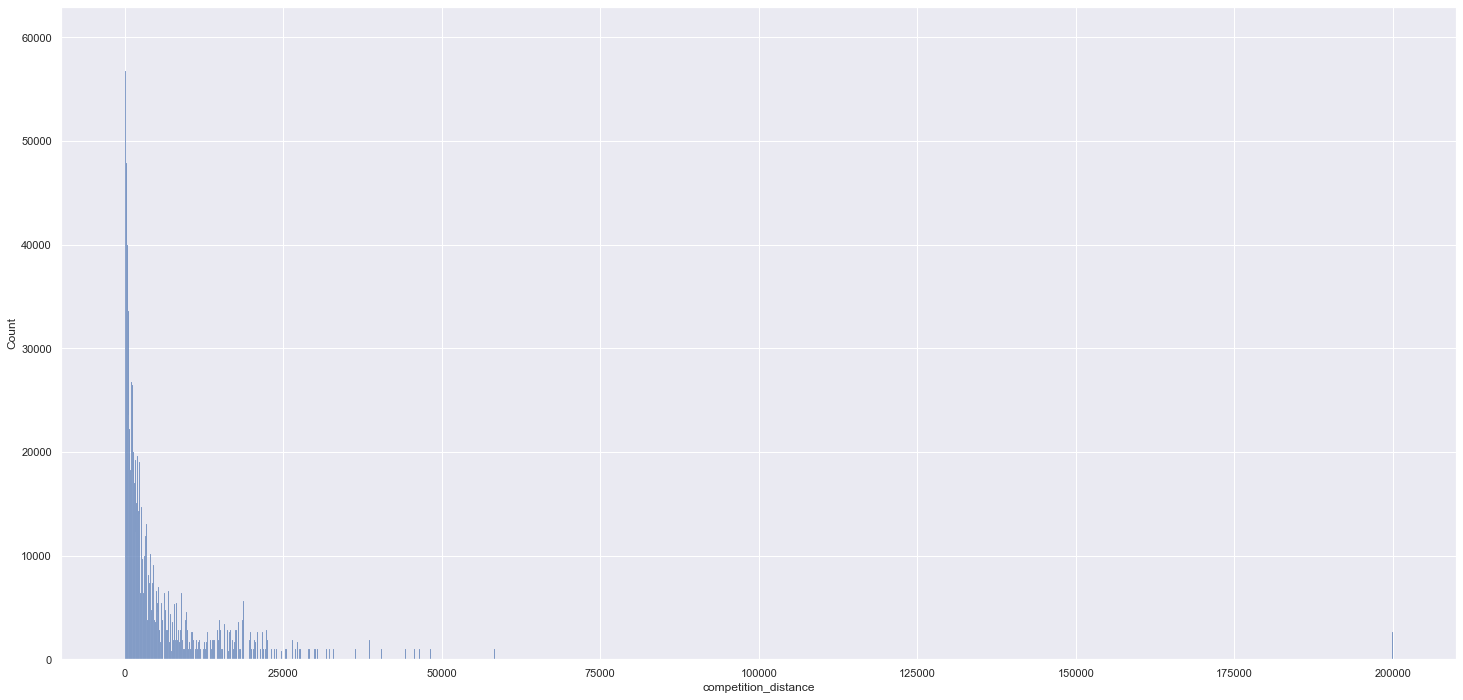

In [50]:
sns.histplot(df1['competition_distance'])

In [51]:
# categoricos atributos
cat_atributos.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

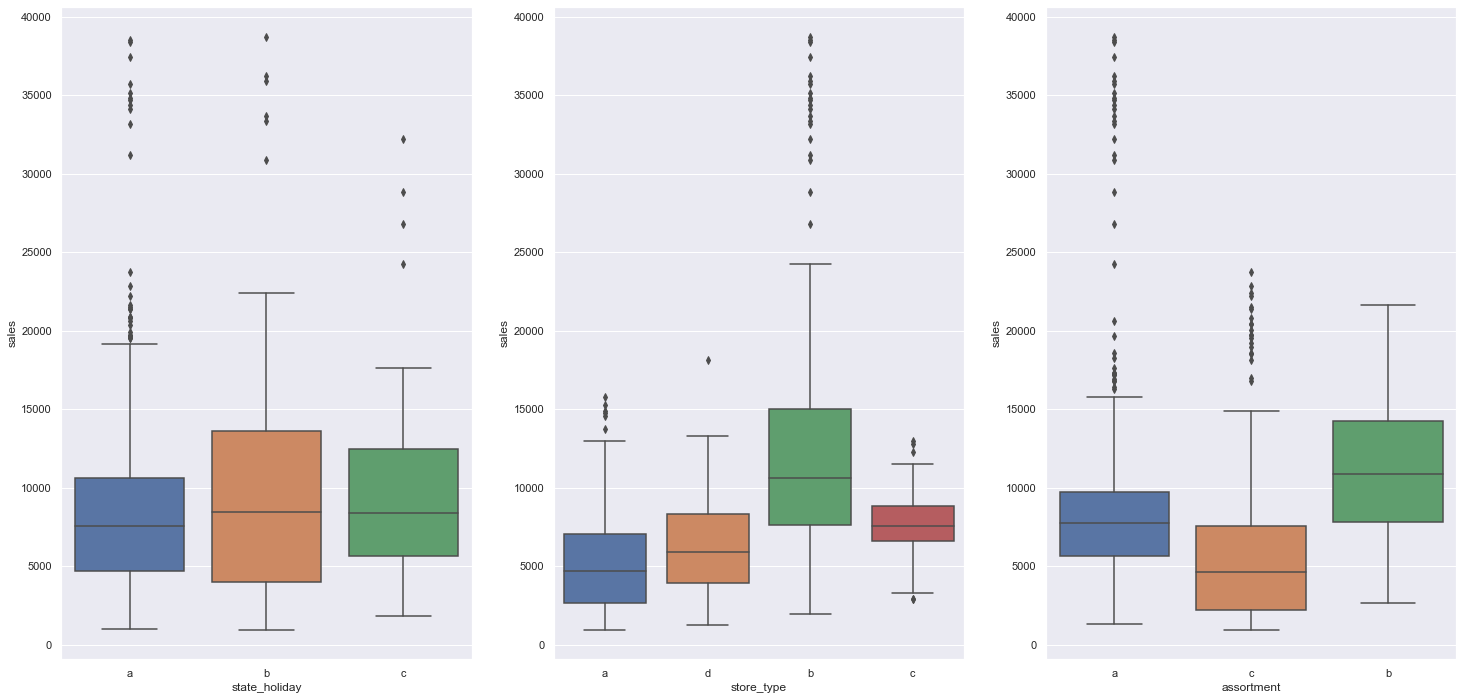

In [52]:
aux1 = df1[(df1['state_holiday']!='0') & (df1['sales']>0)]
plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)
plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux1)
plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux1)

### feature engineering

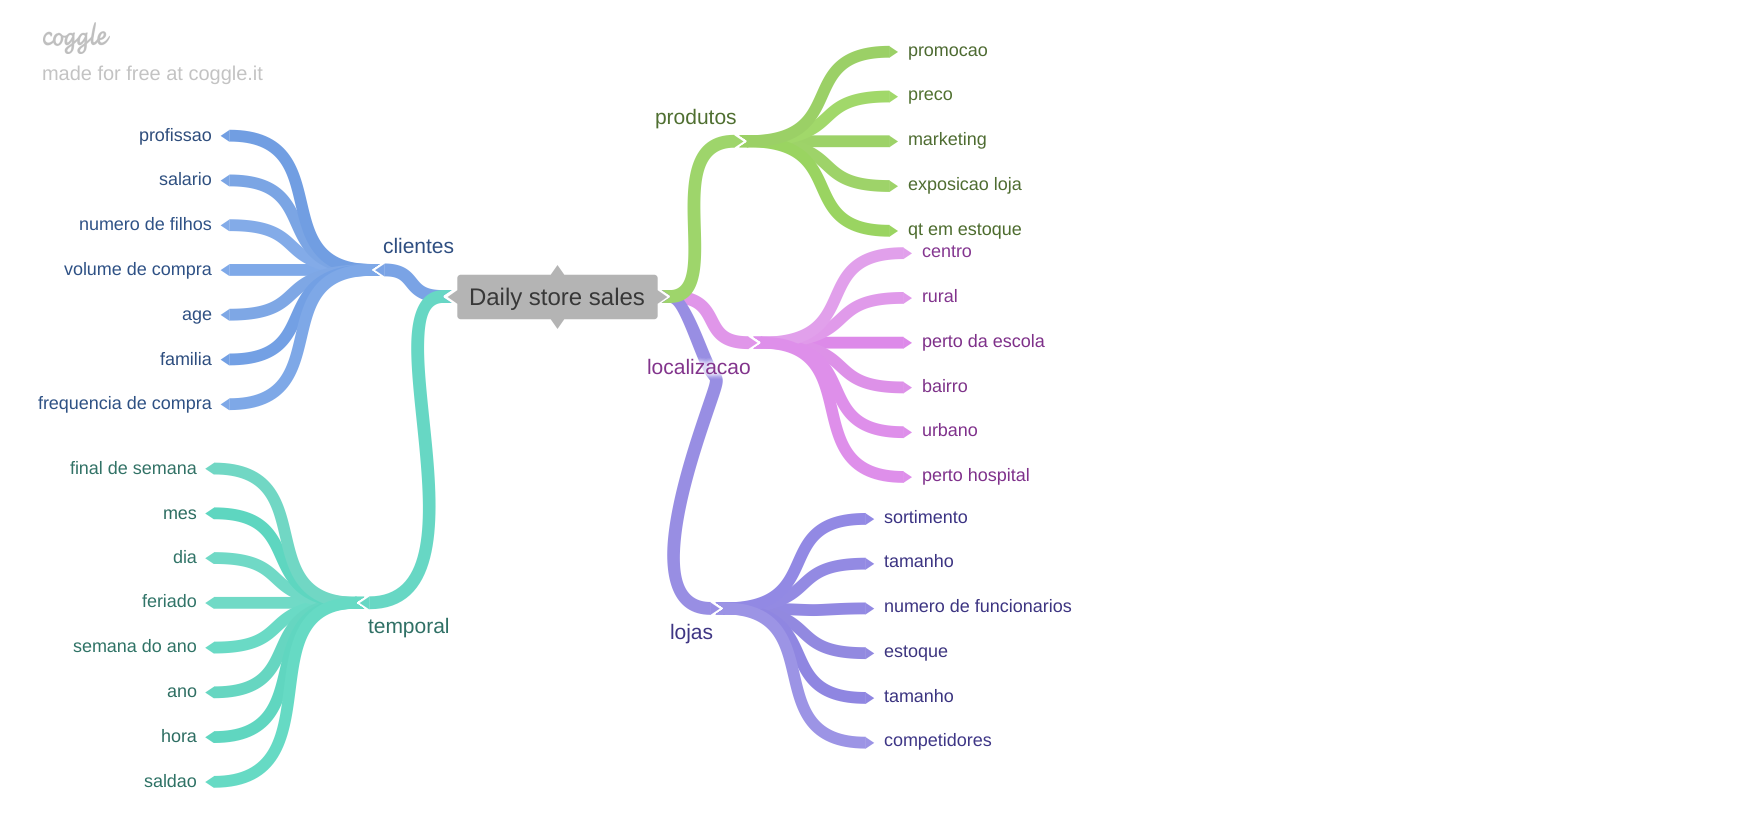

In [53]:
Image('img/Daily_store_sales.png')

#### criacao de hipoteses

##### hipoteses loja
- lojas com mais quadros de funcionarios deveriam vender mais 
- lojas com maior estoque deveriam vender mais 
- lojas com maior porte deveriam vender mais
- lojas com maior sortimento deveriam vender mais
- lojas com competidores mais proximos deveriam vender menos
- lojas com competidores a mais tempo deveriam vender mais

##### hipoteses produtos
- lojas que investe mais em marketing deveriam vender mais
- lojas que expoe mais o produtos nas vitrines deveriam vender mais 
- lojas que tem o preco menores nos produtos deveriam vender mais
- lojas que tem precos por mais tempo nos produtos deveriam vender mais
- lojas com mais promocoes consecutivas deveriam vender mais 

##### hipoteses tempo
- lojas abertas durante o feriado de natal deveriam vender mais
- lojas deveriam vender mais ao longo dos anos
- lojas deveriam vender mais no segundo semestre do ano
- lojas deveriam vender mais depois do dia 10 de cada mes
- lojas deveriam vender menos aos finais de semana
- lojas deveriam vender menos durante os feriados escolares

##### lista final de hipoteses
- lojas com maior sortimento deveriam vender mais
- lojas com competidores mais proximos deveriam vender menos
- lojas com competidores a mais tempo deveriam vender mais
- lojas que tem o preco menores nos produtos deveriam vender mais
- lojas que tem precos por mais tempo nos produtos deveriam vender mais
- lojas com mais promocoes consecutivas deveriam vender mais 
- lojas abertas durante o feriado de natal deveriam vender mais
- lojas deveriam vender mais ao longo dos anos
- lojas deveriam vender mais no segundo semestre do ano
- lojas deveriam vender mais depois do dia 10 de cada mes
- lojas deveriam vender menos aos finais de semana
- lojas deveriam vender menos durante os feriados escolares

#### feature engineerring 2

In [54]:
df2 = df1.copy()

In [55]:
# year
df2['year'] = df2['date'].dt.year
# month
df2['month'] = df2['date'].dt.month
# day
df2['day'] = df2['date'].dt.day
# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week
# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')
# concorrencia
df2['competition_open_since_year'] = df2['competition_open_since_year'].astype(str)
df2['competition_open_since_month'] = df2['competition_open_since_month'].astype(str)
df2['competition_since'] =  df2.apply(lambda x: x['competition_open_since_year']+'-'+x['competition_open_since_month']+'-'+'1', axis=1)
df2['competition_since'] = pd.to_datetime(df2['competition_since'])
df2['competition_time_month'] = ((df2['date'] - df2['competition_since']) /30).apply(lambda x: x.days)
# promocao
df2['promo_since'] = df2['promo2_since_year'].astype(str)+'-'+df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x+'-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week']  = ((df2['date']- df2['promo_since'])/7).apply(lambda x: x.days).astype(int)
# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x== 'a' else 'extra' if x == 'b' else 'extended')
# feriados
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

### filtragem de variaveis

In [56]:
df3 = df2.copy()

##### filtragem das linhas

In [57]:
df3= df3[(df3['open']!= 0) & (df3['sales'] > 0)]

##### selecao das colunas

In [58]:
cols_drop= ['customers', 'open', 'promo_interval', 'month_map']
df3.drop(cols_drop, axis=1)

### analise exploratoria dos dados

In [59]:
df4 = df3.copy()

#### analise univariada

##### response variable

<AxesSubplot:xlabel='sales', ylabel='Count'>

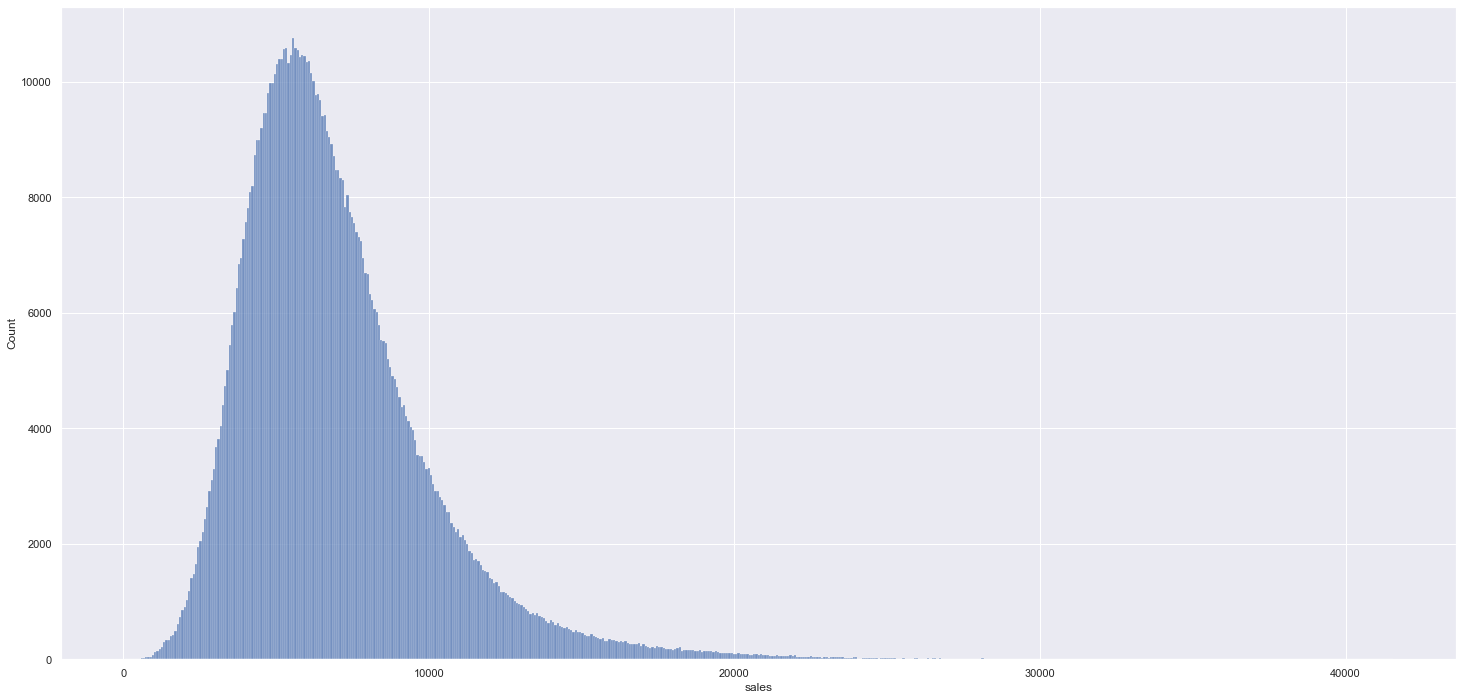

In [60]:
sns.histplot(df4['sales'])

##### numerical variable

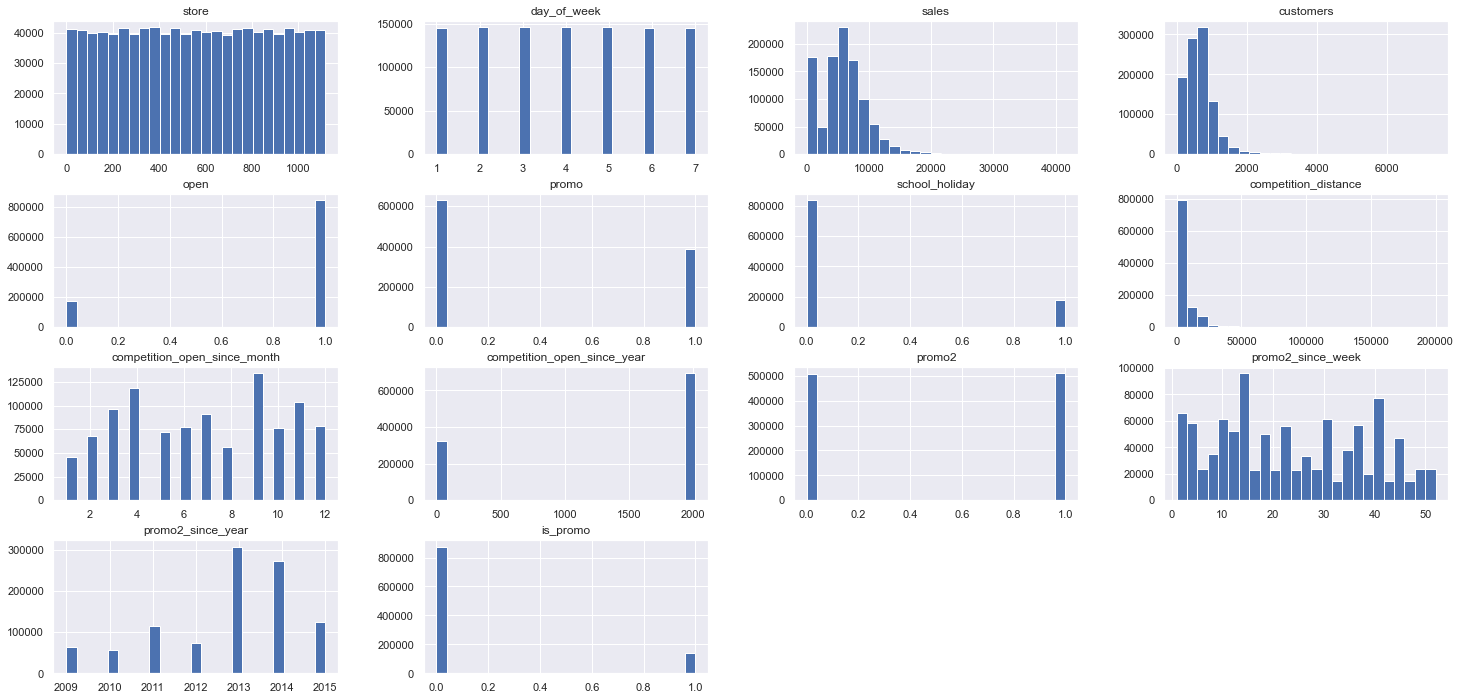

In [61]:
num_atributos.hist(bins=25);

##### categorical variable

In [75]:
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

<AxesSubplot:xlabel='sales', ylabel='Density'>

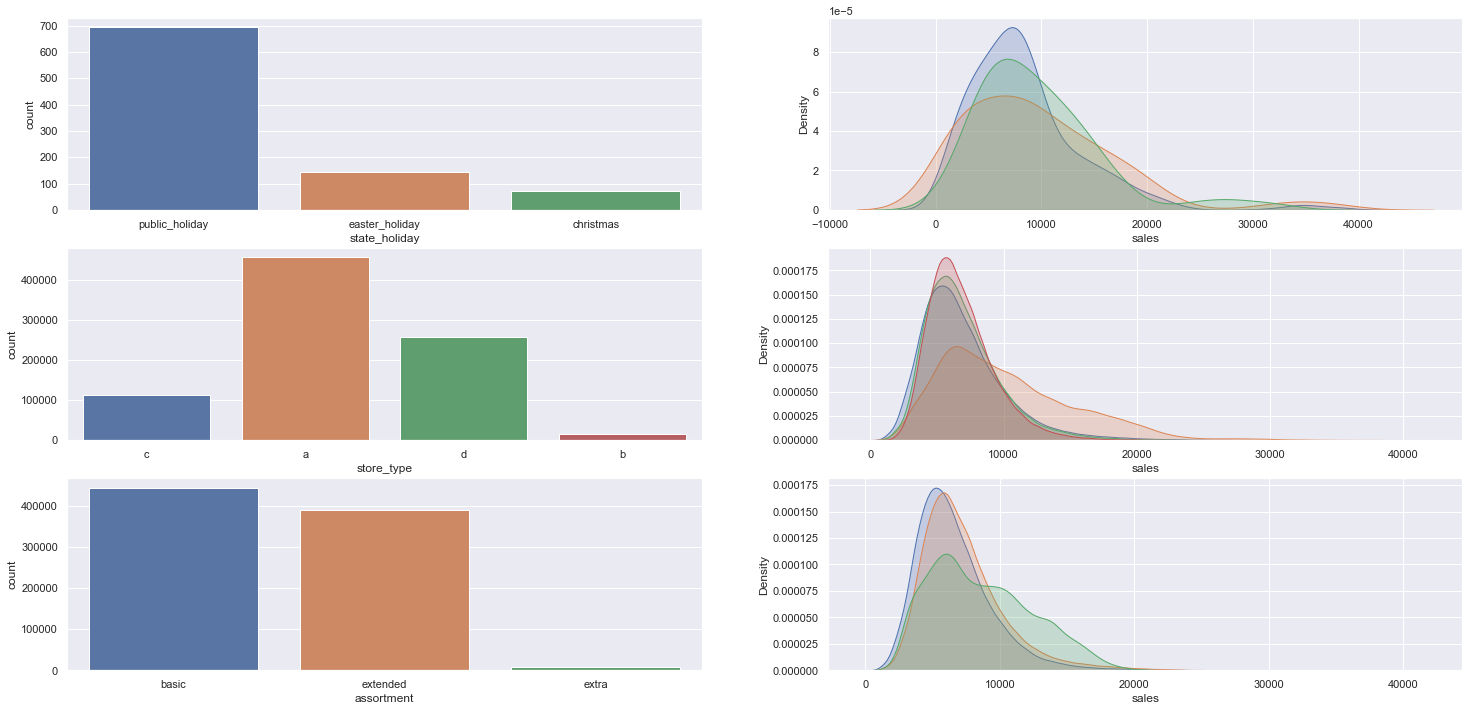

In [76]:
#state_holiday
plt.subplot(3,2,1)
a = df4[df4['state_holiday']!='regular_day']
sns.countplot(x='state_holiday', data=a)
plt.subplot(3,2,2)
sns.kdeplot(df4[df4['state_holiday']=='public_holiday']['sales'],shade=True, label='public_holiday')
sns.kdeplot(df4[df4['state_holiday']=='easter_holiday']['sales'],shade=True, label='easter_holiday')
sns.kdeplot(df4[df4['state_holiday']=='christmas']['sales'], shade=True, label='christmas')
#store_type
plt.subplot(3,2,3)

sns.countplot(x='store_type', data=df4)
plt.subplot(3,2,4)
sns.kdeplot(df4[df4['store_type']=='a']['sales'],shade=True, label='a')
sns.kdeplot(df4[df4['store_type']=='b']['sales'],shade=True, label='b')
sns.kdeplot(df4[df4['store_type']=='c']['sales'], shade=True, label='c')
sns.kdeplot(df4[df4['store_type']=='d']['sales'], shade=True, label='d')
#assortment
plt.subplot(3,2,5)

sns.countplot(x='assortment', data=df4)
plt.subplot(3,2,6)
sns.kdeplot(df4[df4['assortment']=='basic']['sales'],shade=True, label='basic')
sns.kdeplot(df4[df4['assortment']=='extended']['sales'],shade=True, label='extended')
sns.kdeplot(df4[df4['assortment']=='extra']['sales'], shade=True, label='extra')

#### analise bivariada

#### analise multivariada